In [70]:
#!pip install -U python-dotenv
#!pip install spotipy
#!pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.6 MB 5.2 MB/s eta 0:00:02
     ----- ---------------------------------- 1.1/7.6 MB 11.4 MB/s eta 0:00:01
     -------- ------------------------------- 1.7/7.6 MB 15.2 MB/s eta 0:00:01
     ----------- ---------------------------- 2.1/7.6 MB 11.3 MB/s eta 0:00:01
     ----------------- ---------------------- 3.4/7.6 MB 14.4 MB/s eta 0:00:01
     ---------------------- ----------------- 4.3/7.6 MB 15.3 MB/s eta 0:00:01
     --------------------------- ------------ 5.3/7.6 MB 16.2 MB/s eta 0:00:01
     -------------------------------- ------- 6.3/7.6 MB 16.7 MB/s eta 0:00:01
     ---------------------------------------  7.5/7.6 MB 17.9 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 18.1 MB/s eta 0:00:01
     ---------------------------------------- 7.6/7.6 MB 15.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/56.1 kB ? e


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\Jessi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import os
import plotly.express as px
import spotipy
from spotipy import oauth2
from dotenv import load_dotenv
import os
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
path = os.getcwd()

# setting up authentication for spotipy
load_dotenv(dotenv_path=path + f"\env_vars.env")
os.environ['SPOTIPY_CLIENT_ID'] = os.environ.get('SPOTIPY_CLIENT_ID')
os.environ['SPOTIPY_CLIENT_SECRET'] = os.environ.get('SPOTIPY_CLIENT_SECRET')
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

### Part 1: Loading in the Data
#### We will load in my personal data blah blah, you can replace the string with your file path to analyze your music

In [4]:
num_histories = 4
listening = pd.DataFrame()
for i in range(num_histories):
    temp_df = pd.read_json(path + f"\MyData\StreamingHistory{i}.json")
    listening = pd.concat([listening, temp_df])
print(listening.shape)
listening.head(5)

(33284, 4)


,endTime,artistName,trackName,msPlayed
0,2020-12-26 00:02,Michael Schulte,The Love You Left Behind,194546
1,2020-12-26 00:05,Lewis Capaldi,Lost On You,197178
2,2020-12-26 00:08,Arlissa,Praying for Love,182535
3,2020-12-26 00:12,JP Saxe,A Little Bit Yours,225680
4,2020-12-26 00:16,My Brothers And I,Just Getting to Know You,252840


In [5]:
playlists = pd.read_json(path + f"\MyData\Playlist1.json")
playlists.head(5)

,playlists
0,"{'name': 'My Playlist #23', 'lastModifiedDate'..."
1,"{'name': 'My Playlist #22', 'lastModifiedDate'..."
2,"{'name': 'Stealing Spotify Daily Mixes', 'last..."
3,"{'name': 'Jess Chill Reccomended by Spotify', ..."
4,"{'name': 'Jess <3 Vibes?', 'lastModifiedDate':..."


### Part 2: EDA

In [6]:
playlists['playlists'][3]

{'name': 'Jess Chill Reccomended by Spotify',
 'lastModifiedDate': '2021-12-04',
 'items': [{'track': {'trackName': 'House',
    'artistName': 'Joshua Moss',
    'albumName': 'House',
    'trackUri': 'spotify:track:3BdtiKSZveePCDhfncBOFd'},
   'episode': None,
   'localTrack': None},
  {'track': {'trackName': 'Apple Pie',
    'artistName': 'Lizzy McAlpine',
    'albumName': 'Give Me A Minute',
    'trackUri': 'spotify:track:5FKNq0lLJnP3iZzBTD0PZj'},
   'episode': None,
   'localTrack': None},
  {'track': {'trackName': 'Free',
    'artistName': 'Elina',
    'albumName': 'Free',
    'trackUri': 'spotify:track:3hOWsTM9OpI6c72iQHP4EB'},
   'episode': None,
   'localTrack': None},
  {'track': {'trackName': 'Pancakes for Dinner',
    'artistName': 'Lizzy McAlpine',
    'albumName': 'Give Me A Minute',
    'trackUri': 'spotify:track:4HffeEF97c6UxNePgbuECW'},
   'episode': None,
   'localTrack': None}],
 'description': None,
 'numberOfFollowers': 0}

In [57]:
# information based on a single song
track_name, track_artist = 'Hey There Delilah', 'Plain White T\'s'
track_uri = sp.search(q='artist:' + track_artist + ' track:' + track_name, type='track')['tracks']['items'][0]['uri']
# track_analysis = sp.audio_analysis(track_uri) # too much info for me rn
track_features = sp.audio_features(track_uri)
track_features[0]

{'danceability': 0.656,
 'energy': 0.291,
 'key': 2,
 'loudness': -10.572,
 'mode': 1,
 'speechiness': 0.0293,
 'acousticness': 0.872,
 'instrumentalness': 0,
 'liveness': 0.114,
 'valence': 0.298,
 'tempo': 103.971,
 'type': 'audio_features',
 'id': '4RCWB3V8V0dignt99LZ8vH',
 'uri': 'spotify:track:4RCWB3V8V0dignt99LZ8vH',
 'track_href': 'https://api.spotify.com/v1/tracks/4RCWB3V8V0dignt99LZ8vH',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4RCWB3V8V0dignt99LZ8vH',
 'duration_ms': 232533,
 'time_signature': 4}

In [61]:
counts = listening.query('msPlayed >= 3000').groupby(by=['trackName', 'artistName']).size().reset_index()
songs_df = counts.rename(columns={0: 'count'}).sample(n=50, weights='count', random_state=42)#.query('count >= 5').sort_values('count', ascending=False) # either listened to >5 times or top x songs or random x songs
songs_df.head(5)#.to_csv('csv_exports/grouped.csv')

,trackName,artistName,count
2092,I Wish,Declan J Donovan,12
5201,friendship?,Jordy Searcy,10
3966,Sorry That I Do That,Anna Clendening,60
3232,One Day,Lovejoy,3
848,Complicated,Olivia O'Brien,6


In [62]:

lst_of_cols = list(track_features[0].keys())
# lst_of_cols.remove(['type', 'analysis_url'])
# lst_of_cols.remove(x for x in ['type', 'analysis_url'])
[lst_of_cols.remove(col) for col in ['type', 'uri', 'analysis_url', 'track_href']]
def find_info(song):
    # print(song)
    try:
        song_dict = sp.search(q='artist:' + song[1] + ' track:' + song[0], type='track')
        song_uri = song_dict['tracks']['items'][0]['uri']
        track_features = sp.audio_features(song_uri)[0]
        return pd.Series([track_features[i] for i in lst_of_cols])
    except:
        return pd.Series(['DNE'] * len(lst_of_cols))
    
    
songs_df[lst_of_cols] = songs_df[['trackName', 'artistName']].apply(find_info, axis=1)
songs_df.head(5)

,trackName,artistName,count,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
2092,I Wish,Declan J Donovan,12,0.625,0.241,7,-9.312,1,0.0308,0.84500,0.000000,0.1530,0.0960,111.902,7sXnAth7OEXjGhrW7Qsl3Y,198720,4
5201,friendship?,Jordy Searcy,10,0.571,0.224,4,-11.704,1,0.0646,0.69600,0.000000,0.1030,0.5060,108.526,0Io5aNyPCvK31w1hffcTbC,220133,4
3966,Sorry That I Do That,Anna Clendening,60,0.714,0.404,9,-8.759,1,0.0439,0.19600,0.000001,0.2830,0.2990,98.016,2WxCovJaXPloCHw0yJ0Z0z,149821,4
3232,One Day,Lovejoy,3,0.339,0.730,10,-8.568,0,0.0358,0.00737,0.000000,0.0472,0.8370,183.144,58U47mHjyLwUwJZ7voUt15,144375,4
848,Complicated,Olivia O'Brien,6,0.657,0.355,7,-12.047,1,0.0715,0.69400,0.000425,0.1230,0.0808,74.990,226PUvIuxGdceSijXXZRRz,189000,4


### PCA attempt/plotting the PCs/scree plot

In [77]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
cleaned_df = songs_df.set_index('id').drop(columns=['trackName', 'artistName'])
centered_df = cleaned_df - np.mean(cleaned_df, axis=0)
centered_df.head(5)

,count,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,
7sXnAth7OEXjGhrW7Qsl3Y,-12.42,0.06744,-0.14404,2.06,1.13256,0.04,-0.032448,0.213021,-0.018778,0.023014,-0.232712,-3.72418,-11430.34,0.24
0Io5aNyPCvK31w1hffcTbC,-14.42,0.01344,-0.16104,-0.94,-1.25944,0.04,0.001352,0.064021,-0.018778,-0.026986,0.177288,-7.10018,9982.66,0.24
2WxCovJaXPloCHw0yJ0Z0z,35.58,0.15644,0.01896,4.06,1.68556,0.04,-0.019348,-0.435979,-0.018777,0.153014,-0.029712,-17.61018,-60329.34,0.24
58U47mHjyLwUwJZ7voUt15,-21.42,-0.21856,0.34496,5.06,1.87656,-0.96,-0.027448,-0.624609,-0.018778,-0.082786,0.508288,67.51782,-65775.34,0.24
226PUvIuxGdceSijXXZRRz,-18.42,0.09944,-0.03004,2.06,-1.60244,0.04,0.008252,0.062021,-0.018353,-0.006986,-0.247912,-40.63618,-21150.34,0.24


In [73]:
u, s, vt = np.linalg.svd(centered_df, full_matrices = False)
u.shape, s.shape, vt.shape

((50, 14), (14,), (14, 14))

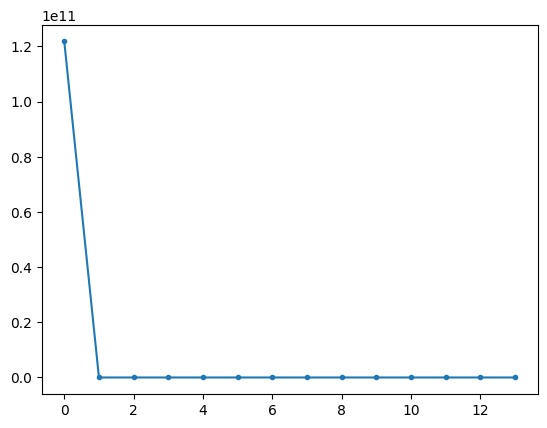

In [78]:
# scree plot
plt.plot(s**2, marker='.')

<Axes: >

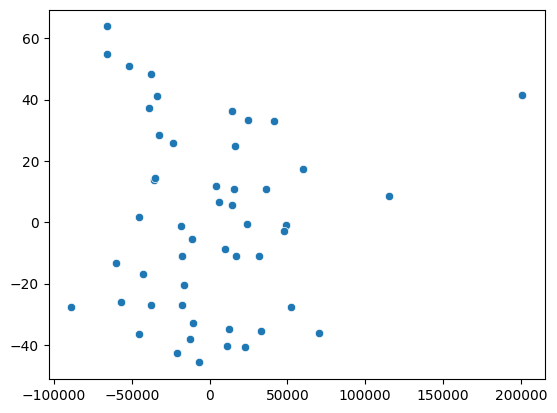

In [79]:
pcs = u * s
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1])

### Part 3: Analyzing the Data
#### PCA/plot/etc, figuring out what matters most in a song, what makes a song similar to another?

### Part 3: Loading in a playlist and comparing it to other songs in the playlist
#### Read in, PCA, plot with colors

### Part 4: Selecting additional relevant songs for playlist
#### Find most similar ones to playlist songs